#### Here building a model to predict the repayment of loan based off of features of borrowers (data from LendingClub). For more information please go through README file in the source repository.

## Import Data Analysis Libraries

In [3]:
import pandas as pd  #for data I/O and dataframe functions
import numpy as np   #for linear Algebra 

## Importing Data Visualization Libraries

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline   #to show plots/graphs

UsageError: unrecognized arguments: #to show plots/graphs


## Getting data and doing Feature Engineering to understand data

In [7]:
loan= pd.read_csv('LendingClub\Loan_data.csv')

In [8]:
loan.head() #to check data/features in dataframe

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [10]:
loan.info() #to know the number of rows/columns and other details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
loan.describe() #to get some statistical values

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [13]:
loan.shape  #checking the shape of dataframe

(9578, 14)

In [14]:
loan.isnull()  #checking for null values

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9574,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9575,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9576,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
loan[loan.isnull()].count()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

#### Here putting columns representation for reference

## Exploratory Data Analysis

#### will be using Matplotlib, seaborn and pandas built-in plotting capabilities for data visualization.

Text(0.5, 0, 'FICO')

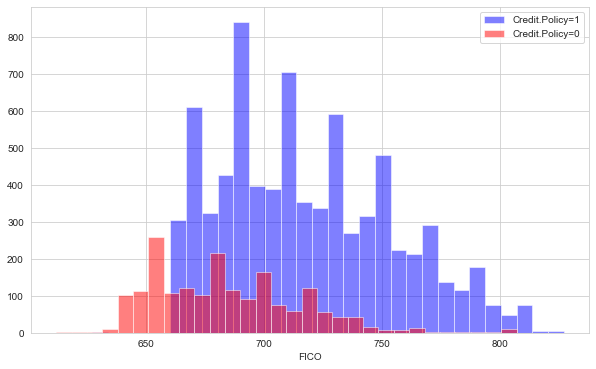

In [19]:
#Creating a histogram of two FICO distributions on top of each other, one for each credit.policy outcome
#using pandas built-in plots
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
loan[loan['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loan[loan['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

In [20]:
#this shows that most of customers meets the credit underwriting criteria of LendingClub.com

Text(0.5, 0, 'FICO')

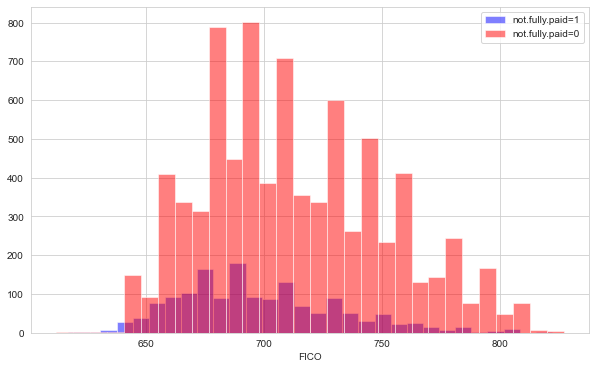

In [22]:
#analyzing the same by not.fully.paid column
plt.figure(figsize=(10,6))
loan[loan['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loan[loan['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

In [23]:
#this shows that most of the customers repayed their loan amount.

<AxesSubplot:xlabel='purpose', ylabel='count'>

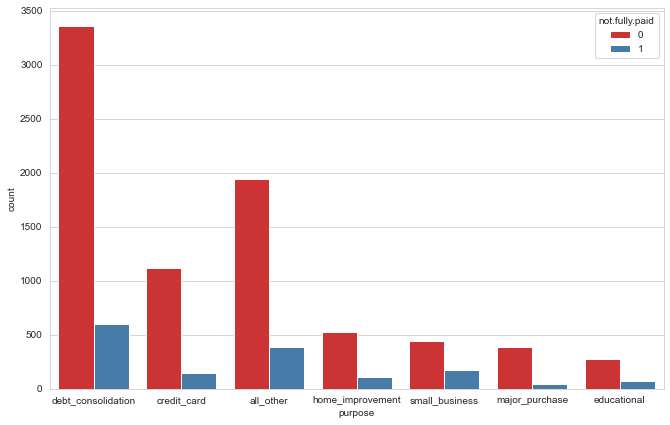

In [24]:
#Checking the counts of loans by purpose, with the color hue defined by not.fully.paid.
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loan,palette='Set1')

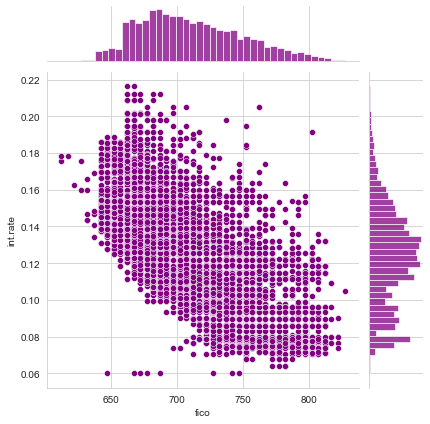

In [25]:
sns.jointplot(x='fico',y='int.rate',data=loan,color='purple')

#checking the trend between FICO score and interest rate

In [27]:
#this indicates that interest rate is high for borrowers having less credit score.

<Figure size 792x504 with 0 Axes>

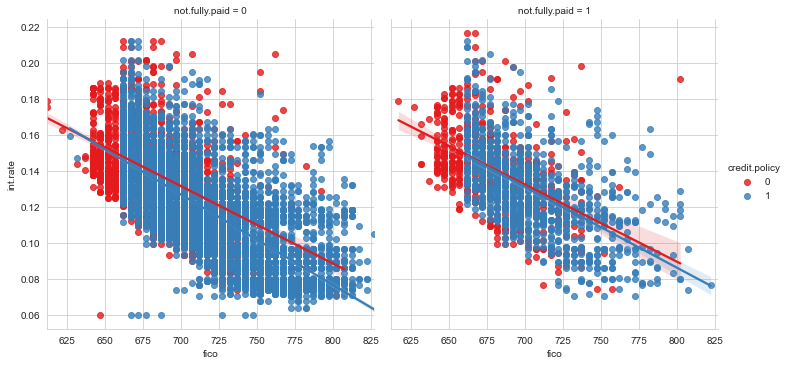

In [28]:
#checking the same as above but with more colums i.e. credit.policy and not.fully.paid 
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loan,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# Setting up the Data

In [29]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical features

Since 'purpose' column is a categorical column, we need to transform this to dummy variables
so the sklearn will be able to understand them

In [31]:
cat_feats = ['purpose']

In [32]:
final_data = pd.get_dummies(loan,columns=cat_feats,drop_first=True)

In [33]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [34]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# Splitting the Features and Target variables

In [38]:
X = final_data.drop('not.fully.paid',axis=1) # Selecting All columns except not.fully.paid column
y = final_data['not.fully.paid']             # Selecting only Class column

In [39]:
X.shape #Shape of X

(9578, 18)

In [40]:
y.shape  #Shape of y

(9578,)

# Train-Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [47]:
X_train.shape  #Shape of X_train

(6704, 18)

In [48]:
X_test.shape  #Shape of X_test

(2874, 18)

In [49]:
y_train.shape  #Shape of y_train

(6704,)

In [50]:
y_test.shape  #Shape of y_test

(2874,)

# Training a Decision Tree Model

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
#Creating an instance of DecisionTreeClassifier() called dtree and fitting it to the training data.

In [56]:
dtree = DecisionTreeClassifier()

In [57]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Predictions and Evaluation of Decision Tree

In [60]:
#Creating predictions from the test set and creating a classification report and a confusion matrix.

In [65]:
predictions = dtree.predict(X_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [68]:
print(confusion_matrix(y_test,predictions))

[[1991  440]
 [ 336  107]]


# Training the Random Forest model

In [69]:
#Creating an instance of the RandomForestClassifier and fitting it to our training data from 
#the previous step.

In [76]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)

In [72]:
#Here n_estimators is the number of trees you want to build before taking the maximum voting or
# averages of predictions

In [80]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=800)

# Predictions and Evaluation

In [78]:
#predicting the y_test values and evaluating the model
predictions = rfc.predict(X_test)

In [79]:
#creating a classification report and a confusion matrix for predictions
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[2424    7]
 [ 437    6]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.46      0.01      0.03       443

    accuracy                           0.85      2874
   macro avg       0.65      0.51      0.47      2874
weighted avg       0.79      0.85      0.78      2874

